In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
cdc = pd.merge(ride_data, city_data, how ="left", on=["city","city"])

# Display the data table for preview
cdc.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types

urban = cdc[cdc['type'] == "Urban"]
suburban = cdc[cdc['type'] == "Suburban"]
rural = cdc[cdc['type'] == "Rural"]

u_ride_count = urban.groupby(['city']).count()["ride_id"]
u_avg_fare =  urban.groupby(['city']).mean()["fare"]
u_driver_count = urban.groupby(['city']).mean()["driver_count"]

s_ride_count = suburban.groupby(['city']).count()["ride_id"]
s_avg_fare =  suburban.groupby(['city']).mean()["fare"]
s_driver_count = suburban.groupby(['city']).mean()["driver_count"]

r_ride_count = rural.groupby(['city']).count()["ride_id"]
r_avg_fare =  rural.groupby(['city']).mean()["fare"]
r_driver_count = rural.groupby(['city']).mean()["driver_count"]

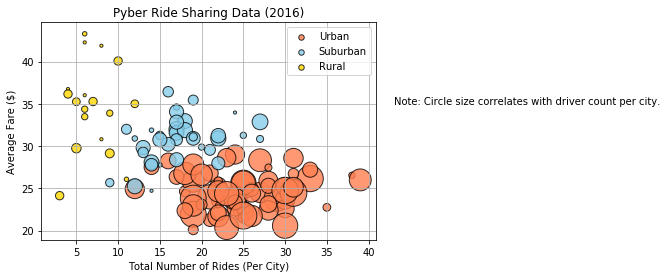

In [4]:
# Build the scatter plots for each city types
u_plot = plt.scatter(u_ride_count,u_avg_fare, s=u_driver_count*10, marker="o", c="coral", edgecolors="black", linewidths=1, alpha=0.8, label="Urban")
s_plot = plt.scatter(s_ride_count,s_avg_fare, s=s_driver_count*10, marker="o", c="Skyblue", edgecolors="black", linewidths=1, alpha=0.8, label="Suburban")
r_plot = plt.scatter(r_ride_count,r_avg_fare, s=r_driver_count*10, marker="o", c="gold", edgecolors="black", linewidths=1, alpha=0.8, label="Rural")

#labels
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

#legends
legend = plt.legend(handles=[u_plot, s_plot, r_plot], loc="best")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

#labels and grid
plt.text(43,35,"Note: Circle size correlates with driver count per city.")
plt.grid()

# Save Figure

plt.show()

## Total Fares by City Type

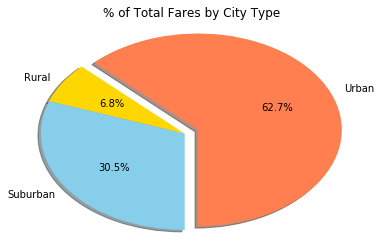

In [62]:
# Calculate Type Percents
total_fare = ride_data["fare"].sum()

u_fare = urban["fare"].sum()
s_fare = suburban["fare"].sum()
r_fare = rural["fare"].sum()

u_perc_fare = u_fare / total_fare*100
s_perc_fare = s_fare / total_fare*100
r_perc_fare = r_fare / total_fare*100


#
labels = ["Urban", "Rural", "Suburban"]
sizes = [u_perc_fare, r_perc_fare, s_perc_fare]
colors = ["coral", "gold", "skyblue"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("% of Total Fares by City Type")

#save figure
plt.savefig("Images/PercentTotalFares.png")
plt.axis('auto')
plt.show()

## Total Rides by City Type

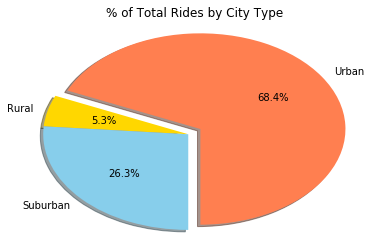

In [61]:
# Calculate Type Percents
total_rides = ride_data["ride_id"].count()

u_rides = urban["ride_id"].count()
s_rides = suburban["ride_id"].count()
r_rides = rural["ride_id"].count()

u_perc_ride = u_rides / total_rides*100
s_perc_ride = s_rides / total_rides*100
r_perc_ride = r_rides / total_rides*100


#
labels = ["Urban", "Rural", "Suburban"]
sizes = [u_perc_ride, r_perc_ride, s_perc_ride]
colors = ["coral", "gold", "skyblue"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("% of Total Rides by City Type")

#save figure
plt.savefig("Images/PercentTotalRides.png")

# Show Figure
plt.axis('auto')
plt.show()

## Total Drivers by City Type

C:\Users\jones\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  del sys.path[0]


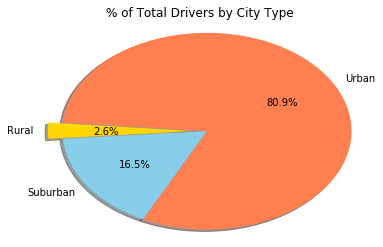

In [63]:
# Calculate Driver Percents
drivers_grouped = city_data.groupby('type')['driver_count'].sum()
total_drivers = drivers_grouped.sum()

perc_drivers = (drivers_grouped / total_drivers)*100

#labels
labels = ["Rural", "Suburban", "Urban"]
sizes = [perc_drivers]
colors = ["gold", "skyblue", "coral"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=175)
plt.title("% of Total Drivers by City Type")

#save figure
plt.savefig("Images/PercentTotalDrivers.png")

# Show Figure
plt.axis('auto')
plt.show()
